In [ ]:
# A notebook to try out tensorflow
# Got some weather data from Kaggle
# 

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

import os
import tempfile
import pathlib
import pandas as pd
from keras_visualizer import visualizer 
import matplotlib.pyplot as plt
from keras.models import Sequential
tmpdir = tempfile.mkdtemp()
from keras import optimizers
from keras.layers import Dense
from keras import activations

import seaborn as sns

2023-02-21 10:37:21.958724: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-21 10:37:21.958833: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-21 10:37:23.146711: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-21 10:37:23.146793: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-21 10:37:23.146804: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [2]:
dataset = pd.read_csv("archive/london_weather.csv",
    names=["date", "cloud_cover", "sunshine", "global_radiation", "max_temp",
           "mean_temp", "min_temp", "precipitation","pressure","snow_depth"])
dataset.drop(['date'],axis=1)
#print(dataset)

'''
    date - recorded date of measurement - (int)
    cloud_cover - cloud cover measurement in oktas - (float)
    sunshine - sunshine measurement in hours (hrs) - (float)
    global_radiation - irradiance measurement in Watt per square meter (W/m2) - (float)
    max_temp - maximum temperature recorded in degrees Celsius (°C) - (float)
    mean_temp - mean temperature in degrees Celsius (°C) - (float)
    min_temp - minimum temperature recorded in degrees Celsius (°C) - (float)
    precipitation - precipitation measurement in millimeters (mm) - (float)
    pressure - pressure measurement in Pascals (Pa) - (float)
    snow_depth - snow depth measurement in centimeters (cm) - (float)


'''



'\n    date - recorded date of measurement - (int)\n    cloud_cover - cloud cover measurement in oktas - (float)\n    sunshine - sunshine measurement in hours (hrs) - (float)\n    global_radiation - irradiance measurement in Watt per square meter (W/m2) - (float)\n    max_temp - maximum temperature recorded in degrees Celsius (°C) - (float)\n    mean_temp - mean temperature in degrees Celsius (°C) - (float)\n    min_temp - minimum temperature recorded in degrees Celsius (°C) - (float)\n    precipitation - precipitation measurement in millimeters (mm) - (float)\n    pressure - pressure measurement in Pascals (Pa) - (float)\n    snow_depth - snow depth measurement in centimeters (cm) - (float)\n\n\n'

In [3]:
print(dataset.isnull().values.any())
dataset.dropna(inplace=True)
dataset = dataset.loc[~((dataset['snow_depth'] == 0))]
print(dataset.isnull().values.any())


True
False


In [4]:
#sns.pairplot(dataset[['cloud_cover',  'sunshine',  'global_radiation' , 'max_temp',  'min_temp',  'precipitation' , 'pressure' , 'snow_depth']], diag_kind='kde')


In [5]:
#print(dataset)
normalized_dataset=(dataset-dataset.min())/(dataset.max()-dataset.min())

dataset=normalized_dataset
#print(normalized_dataset)
print(dataset)

train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)


           date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0      0.000000        0.250  0.760870          0.210526  0.283784   0.175879   
1      0.000002        0.750  0.184783          0.078947  0.252252   0.251256   
2      0.000005        0.625  0.000000          0.005263  0.238739   0.241206   
3      0.000007        1.000  0.000000          0.005263  0.166667   0.251256   
4      0.000010        0.750  0.217391          0.089474  0.432432   0.341709   
...         ...          ...       ...               ...       ...        ...   
12440  0.849840        0.625  0.000000          0.021053  0.292793   0.341709   
14223  0.952534        1.000  0.000000          0.000000  0.337838   0.447236   
14303  0.975074        0.750  0.576087          0.431579  0.193694   0.216080   
14321  0.975299        1.000  0.000000          0.173684  0.423423   0.366834   
14641  1.000000        1.000  0.000000          0.036842  0.414414   0.376884   

       min_temp  precipitat

In [6]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()
print(train_features.isnull().values.any())
print(test_features.isnull().values.any())
train_features.dropna(inplace=True)
test_features.dropna(inplace=True)
train_labels = train_features.pop('snow_depth')
test_labels = test_features.pop('snow_depth')
train_labels.dropna(inplace=True)
test_labels.dropna(inplace=True)

print(train_features.isnull().values.any())
print(test_features.isnull().values.any())


print("len train features",len(train_features))
print("len test features",len(test_features))
print("len train labels",len(train_labels))
print("len test labels",len(test_labels))


normalizer = tf.keras.layers.Normalization(axis=-1)

normalizer.adapt(np.array(train_features))


False
False
False
False
len train features 111
len test features 28
len train labels 111
len test labels 28


2023-02-21 10:37:25.463490: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-02-21 10:37:25.463532: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (archlinux): /proc/driver/nvidia/version does not exist


In [7]:
#MODELS_DIR = 'models/'
#if not os.path.exists(MODELS_DIR):
#    os.mkdir(MODELS_DIR)
#MODEL_TF = MODELS_DIR + 'model'
#MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
#MODEL_TFLITE = MODELS_DIR + 'model.tflite'
#MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'

In [8]:
#model = tf.keras.Sequential([Dense(units=5, input_shape=[1])])

#model = tf.keras.Sequential([Dense(units=5, input_shape=[9])])
#model.add(keras.layers.Dense(units=10)) #hidden layer
#model.add(keras.layers.Dense(units=10)) #hidden layer
#model.add(keras.layers.Dense(units=10)) #hidden layer
#model.add(keras.layers.Dense(units=10)) #hidden layer
#model.add(keras.layers.Dense(units=10)) #hidden layer
#model.add(keras.layers.Dense(units=10)) #hidden layer
#model.add(keras.layers.Dense(units=10)) #hidden layer
#model.add(keras.layers.Dense(units=10)) #hidden layer
#model.add(keras.layers.Dense(units=10)) #hidden layer
#model.add(keras.layers.Dense(10,activation='relu')) #hidden layer

#model.add(keras.layers.Dense(1))
#0.3463


In [9]:

#model = tf.keras.Sequential([Dense(units=10, input_shape=[9])])
#model.add(keras.layers.Dense(units=10)) #hidden layer
#model.add(keras.layers.Dense(units=10)) #hidden layer
#model.add(keras.layers.Dense(units=10)) #hidden layer
#model.add(keras.layers.Dense(units=10)) #hidden layer
#model.add(keras.layers.Dense(units=10)) #hidden layer
#model.add(keras.layers.Dense(units=10)) #hidden layer
#model.add(keras.layers.Dense(units=10)) #hidden layer
#model.add(keras.layers.Dense(units=10)) #hidden layer
#model.add(keras.layers.Dense(units=10)) #hidden layer
#model.add(keras.layers.Dense(10,activation='relu')) #hidden layer

#model.add(keras.layers.Dense(1))
#.3238

In [10]:
#model = tf.keras.Sequential([Dense(units=10, input_shape=[9])])
#model.add(keras.layers.Dense(units=10)) #hidden layer
#model.add(keras.layers.Dense(units=10)) #hidden layer
#model.add(keras.layers.Dense(units=10)) #hidden layer
#model.add(keras.layers.Dense(units=10)) #hidden layer


#model.add(keras.layers.Dense(1,activation='relu'))
#0.5162

In [11]:
model = tf.keras.Sequential([Dense(units=4, input_shape=[9])])
model.add(keras.layers.Dense(units=4,activation='relu')) #hidden layer
model.add(keras.layers.Dense(units=4,activation='relu')) #hidden layer
model.add(keras.layers.Dense(units=4,activation='relu')) #hidden layer
model.add(keras.layers.Dense(units=4,activation='relu')) #hidden layer


model.add(keras.layers.Dense(units=1,activation='relu'))
#0.9898

In [12]:
#model = tf.keras.Sequential([Dense(units=9, input_shape=[9])])
#model.add(keras.layers.Dense(units=50)) #hidden layer
#model.add(keras.layers.Dense(units=40)) #hidden layer
#model.add(keras.layers.Dense(units=30)) #hidden layer
#model.add(keras.layers.Dense(units=20)) #hidden layer


#model.add(keras.layers.Dense(1,activation='sigmoid'))
#unknown

In [13]:
#model = tf.keras.Sequential([Dense(10, input_shape=[1])])#
#model.add(keras.layers.Dense(10)) #hidden layer
#model.add(keras.layers.Dense(10)) #hidden layer
#model.add(keras.layers.Dense(1)) #hidden layer

#model.add(keras.layers.Activation(activations.relu))

#0.3463

In [14]:
opt = keras.optimizers.Adam(learning_rate=0.1)
#model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
#opt=tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.0, nesterov = False)
#opt=tf.keras.optimizers.RMSprop(learning_rate = 0.0001, rho = 0.5)
#opt=keras.optimizers.Adagrad(learning_rate = 0.01)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])


In [15]:
#tf.keras.utils.plot_model(
#    model,
#    to_file='model.png',
#    show_shapes=False,
#    show_dtype=False,
#    show_layer_names=True,
#    rankdir='TB',
#    expand_nested=False,
#    dpi=96,
#    layer_range=None,
#    show_layer_activations=False
#)


In [16]:
visualizer(model, format='png', view=True)

In [17]:
#for layer in model.layers: print(layer.get_config(), layer.get_weights())

In [18]:
xs1 = train_features.sunshine

#ys = train_labels


In [19]:
#history = model.fit(xs1, train_labels, epochs=100)
history = model.fit(train_features, train_labels,batch_size=1000, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0497 - accuracy: 0.3694
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.2955 - accuracy: 0.0090
Epoch 3/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0572 - accuracy: 0.3694
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0445 - accuracy: 0.3694
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0475 - accuracy: 0.3694
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0503 - accuracy: 0.3694
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0549 - accuracy: 0.3694
Epoch 8/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0523 - accuracy: 0.3694
Epoch 9/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0428 - accuracy: 0.3694
Epoch 10/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0543 - accuracy: 0.3694
Epoch 11/1000
1/1 

1/1 [==============================] - 0s 12ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 166/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 167/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 168/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 169/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 170/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 171/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 172/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 173/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 174/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 175

1/1 [==============================] - 0s 10ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 328/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 329/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 330/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 331/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 332/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 333/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 334/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 335/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 336/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 337

1/1 [==============================] - 0s 10ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 490/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 491/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 492/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 493/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 494/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 495/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 496/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 497/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 498/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 499

1/1 [==============================] - 0s 9ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 652/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 653/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 654/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 655/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 656/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 657/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 658/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 659/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 660/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 661/1

1/1 [==============================] - 0s 12ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 814/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 815/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 816/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 817/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 818/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 819/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 820/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 821/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 822/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 823

1/1 [==============================] - 0s 9ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 976/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 977/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 978/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 979/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 980/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 981/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 982/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 983/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 984/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0397 - accuracy: 0.3694
Epoch 985/1

Text(0.5, 0, 'Epoch')

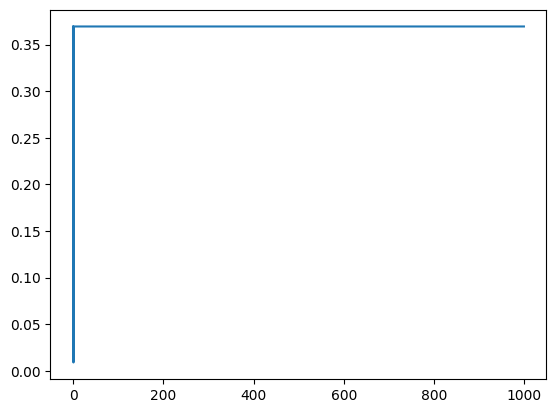

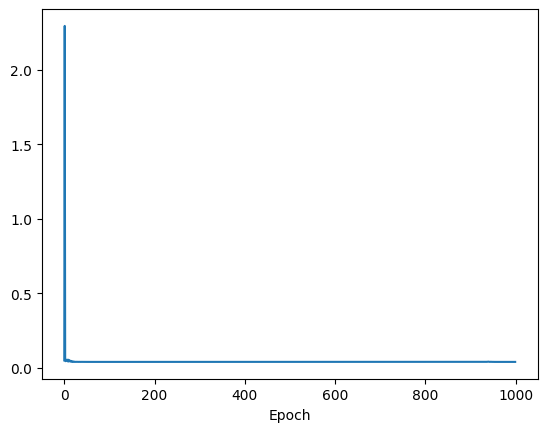

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.figure()
plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_loss'], label='val_loss')
#plt.ylim([0, 10])
plt.xlabel('Epoch')


2/2 [==============================] - 0s 6ms/step


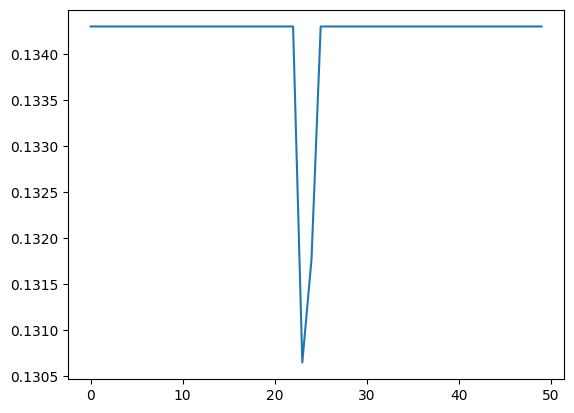

In [21]:
# make a plot of the input

a=np.linspace(-1,1,50)
a=np.vstack((a,np.linspace(-1,1,50)))
a=np.vstack((a,np.linspace(-1,1,50)))
a=np.vstack((a,np.linspace(-1,1,50)))
a=np.vstack((a,np.linspace(-1,1,50)))
a=np.vstack((a,np.linspace(-1,1,50)))
a=np.vstack((a,np.linspace(-1,1,50)))
a=np.vstack((a,np.linspace(-1,1,50)))
a=np.vstack((a,np.linspace(-1,1,50)))

a=np.transpose(a)
#print(a)
df = pd.DataFrame(a, columns = ["cloud_cover", "sunshine", "global_radiation", "max_temp",
           "mean_temp", "min_temp", "precipitation","pressure","snow_depth"])
#print(df)

result=model.predict(df)
#print(result)
plt.plot(result)

In [22]:
#for layer in model.layers: print(layer.get_config(), layer.get_weights())

In [23]:
#net_save_path = os.path.join(tmpdir, "net/1/")
#savedir="/home/fred/"
#net_save_path = os.path.join(tmpdir, "net/1/")
#tf.saved_model.save(model, net_save_path)


1/1 [==============================] - 0s 23ms/step


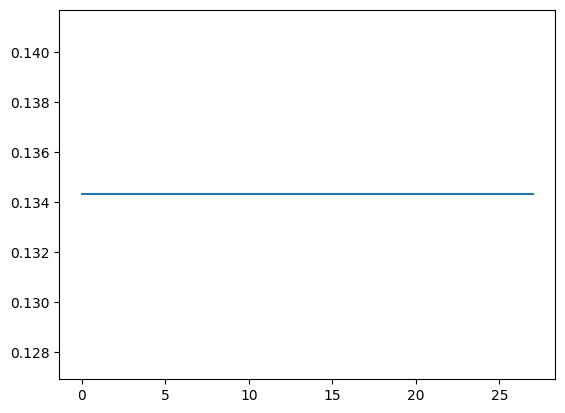

In [24]:
a=model.predict(test_features)
plt.plot(a)

In [25]:
#plt.savefig('nn3.png')

In [26]:
print(train_features)

           date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
13     0.000032        0.875  0.000000          0.010526  0.481982   0.351759   
8797   0.600100        0.625  0.380435          0.210526  0.576577   0.542714   
11679  0.777611        0.875  0.000000          0.000000  0.274775   0.412060   
11333  0.774831        1.000  0.000000          0.010526  0.261261   0.427136   
1104   0.075001        1.000  0.000000          0.010526  0.144144   0.251256   
...         ...          ...       ...               ...       ...        ...   
2236   0.150245        0.500  0.423913          0.289474  0.171171   0.256281   
11681  0.777616        0.625  0.010870          0.010526  0.355856   0.306533   
10990  0.750065        1.000  0.000000          0.042105  0.211712   0.331658   
6261   0.425196        0.875  0.043478          0.131579  0.567568   0.412060   
2935   0.199983        1.000  0.000000          0.010526  0.229730   0.145729   

       min_temp  precipitat

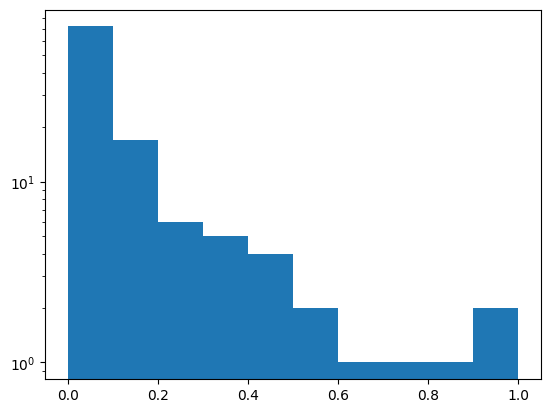

In [27]:
plt.hist(train_labels)
plt.yscale('log')